# Collaboration 4-25

In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
sys.path.insert(0, '..')


plt.rcParams['figure.figsize'] = [10, 8]
from graph import Graph
from collaboration import *

In [2]:
n = 100
k = 100000
c = 5
cs = np.arange(c, step=0.01)

def f_exp(x, a1, a2, a3):
    return a1*np.exp(-a2*x)+a3


In [5]:
coefficients = []
for d in range(5, n+1):
    graph = Graph.get_er_random_graph(n, d/n)
    t = c*n
    print(f"Simulating d={d}...", end="")
    collab_covered_avg, single_covered_avg = simulate_rw_collab_vs_single(
        graph=graph, 
        collab_num=2, 
        k=k, 
        collab_steps_per_iter=t)
    diff = collab_covered_avg - np.array([single_covered_avg[2*i] for i in range(c*n+1)])
    
    scaled_diff = np.array([diff[int(i*n)] for i in cs])
    popt, pcov = curve_fit(f_exp, cs, scaled_diff, maxfev=10000)
    coefficients.append(list(popt))
    print("done!")

Simulating d=5...done!
Simulating d=6...done!
Simulating d=7...done!
Simulating d=8...done!
Simulating d=9...done!
Simulating d=10...done!
Simulating d=11...done!
Simulating d=12...done!
Simulating d=13...done!
Simulating d=14...done!
Simulating d=15...done!
Simulating d=16...done!
Simulating d=17...done!
Simulating d=18...done!
Simulating d=19...done!
Simulating d=20...done!
Simulating d=21...done!
Simulating d=22...done!
Simulating d=23...done!
Simulating d=24...done!
Simulating d=25...done!
Simulating d=26...done!
Simulating d=27...done!
Simulating d=28...done!
Simulating d=29...done!
Simulating d=30...done!
Simulating d=31...done!
Simulating d=32...done!
Simulating d=33...done!
Simulating d=34...done!
Simulating d=35...done!
Simulating d=36...done!
Simulating d=37...done!
Simulating d=38...done!
Simulating d=39...done!
Simulating d=40...done!
Simulating d=41...done!
Simulating d=42...done!
Simulating d=43...done!
Simulating d=44...done!
Simulating d=45...done!
Simulating d=46...don

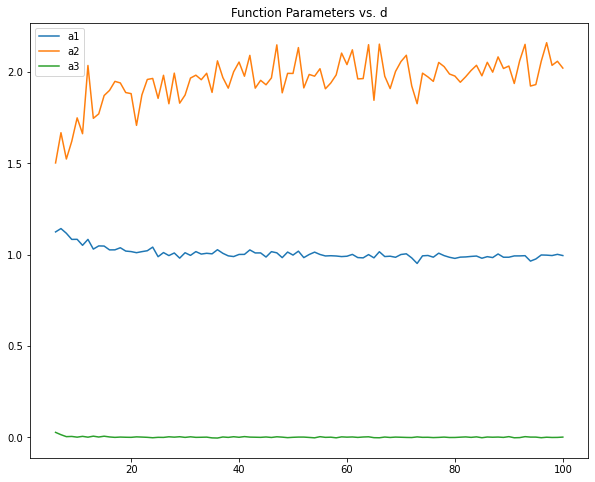

In [9]:
plt.plot(np.arange(6, n+1), coefficients[1:], label=["a1", "a2", "a3"])
plt.title("Function Parameters vs. d")
plt.legend()
plt.show()